In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

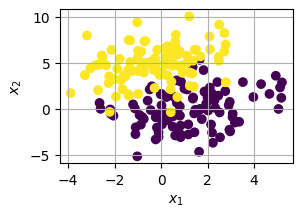

(200, 1)


In [38]:
# dataset
np.random.seed(0)
N = 100
a = np.random.multivariate_normal([1, 0], [[3, 1], [1, 4]], size=[N,])
b = np.random.multivariate_normal([0, 5], [[3, 1], [1, 4]], size=[N,])
X = np.vstack((a, b))
y = np.hstack((np.zeros(N), np.ones(N))).reshape(-1, 1)
plt.figure(figsize=(3, 2))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()
plt.show()
print(y.shape)

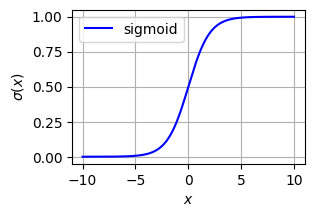

In [39]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.r_[-10:10:0.01]
plt.figure(figsize=(3, 2))
plt.plot(x, sigmoid(x), 'b', label='sigmoid')
plt.xlabel('$x$')
plt.ylabel('$\sigma(x)$')
plt.grid()
plt.legend()
plt.show()

In [40]:
def loss_function(X, y, w):
  M = X.shape[0] # number of points in dataset
  y_hat = sigmoid(X @ w)
  loss = -1/M * (y.T @ np.log(y_hat) + (1 - y).T @ np.log(1 - y_hat))
  grad = 1/M * X.T @ (y_hat - y)
  return loss, grad
  #return -1/M * (y.T @ np.log(y_hat) + (1 - y).T @ np.log(1 - y_hat)), 1/M * X.T @ (y_hat - y)

# Usage example
w = np.array([[1], [2]])
print(w.shape)
loss, grad = loss_function(X, y, w)
print(loss, loss.shape)
print(grad, grad.shape)

(2, 1)
[[1.34226046]] (1, 1)
[[0.55470169]
 [0.32532802]] (2, 1)


[[-0.83597508]
 [ 0.62966468]]


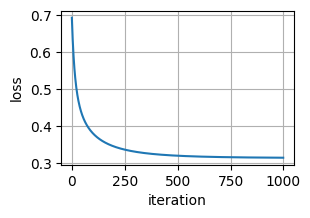

In [44]:
def gradient_descent(X, y, learning_rate=0.01, max_iter=1000):
  w = np.zeros((X.shape[1],1))
  loss_history = []
  for i in range(max_iter):
    loss, grad = loss_function(X, y, w)
    w = w - learning_rate * grad
    loss_history.append(loss)
  return w, loss_history

w, loss_history = gradient_descent(X, y, 0.01, 1000)
print(w)
plt.figure(figsize=(3, 2))
plt.plot(np.array(loss_history).reshape(-1))
plt.xlabel('iteration')
plt.ylabel('loss')
plt.grid()
plt.show()

In [45]:
def add_ones(X):
  M = X.shape[0]
  return np.hstack((np.ones((M, 1)), X))

print(add_ones(X).shape)

(200, 3)


In [52]:
def logistic_reg(X,y):
  X1 = add_ones(X)
  w, _ = gradient_descent(X1, y)
  return w

w = logistic_reg(X, y)
print(w)

[[-0.88435066]
 [-0.75160453]
 [ 0.76211684]]


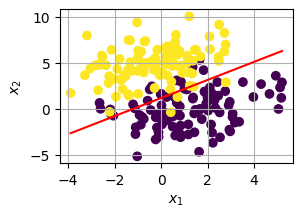

In [49]:
# plot decision boundary
plt.figure(figsize=(3, 2))
plt.scatter(X[:, 0], X[:, 1], c=y)
x_boundary = np.r_[np.min(X[:, 0]):np.max(X[:, 0]):100j]
y_boundary = -(w[0] + w[1] * x_boundary) / w[2]
plt.plot(x_boundary, y_boundary, 'r')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()
plt.show()

In [69]:
y_hat = sigmoid(add_ones(X) @ w)
y_hat_bin = (y_hat > 0.5).astype(int)
y_hat_bin2 = (add_ones(X) @ w > 0).astype(int)
print((y_hat_bin == y_hat_bin2).sum())
errors = y == y_hat_bin
y_hat_bin[y == 0] == 1

200


array([False, False,  True, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
        True,  True,  True, False, False, False,  True, False, False,
       False])